#   Bitcoin Fiyat Tahmini

Bitcoin adlı sanal varlığın gelecekteki fiyat hareketlerini tahmin edebilmek için bir model eğitelim.

Veriyi temizlemek, işlemek ve görselleştirmek için gerekli kütüphanelerimizi dahil ederek başlayalım.

In [85]:
import pandas as pd
import numpy as np 
import sklearn as sk

import mplfinance as mpf
import warnings

pd.options.display.precision = 2 # Sayılar dolar cinsinden olduğu için noktadan sonra 2 basamak olmalı.
warnings.filterwarnings('ignore')

**Numpy**: NumPy (Numerical Python) bilimsel hesaplamaları hızlı bir şekilde yapmamızı sağlayan bir matematik kütüphanesidir.

**Pandas**: Veri analitiği alanında, özellikle veri işleme ve analizi için sıklıkla kullanılan bir Python paketidir. Veriyi Excel'e benzer bir tablo yapısında işlemenize olanak tanır ve CSV, Excel vb. pek çok farklı formattaki veriyi işlemeniz mümkün olabilir.

**MPLFinance**: Finansal verileri Python'da görselleştirmek için tasarlanmış bir kütüphanedir. Matplotlib alt yapısını kullanarak mum çubuk grafikleri, hacim grafikleri, teknik göstergeler ve diğer finansal göstergeleri kolayca oluşturmanıza olanak tanır. Kullanacağımız veri setini görselleştirmek için mathplotlib'ten daha uygundur.

**Scikit-Learn**: Python dilinde makine öğrenimi uygulamaları geliştirmek için en popüler kütüphanelerden biridir. Basit ve kullanımı kolay arayüzü, geniş algoritma yelpazesi ve aktif topluluğu makine öğrenmesinde güncel olarak kullanılan bir kütüphanedir.

Şimdi **Bitcoin'in** ilk yaratıldığı 27-07-2010 tarihinden 25-04-2024 tarihine kadarki tüm sayılar verileri içeren dosyamızı çalışma ortamına dahil edelim.

In [86]:
df = pd.read_csv('bitcoin_2010-07-27_2024-04-25.csv', parse_dates=['Start', 'End']) # Start ve End sütunlarını datetime objesine çevirerek işlemlerimizde kolaylık sağlayalım.

## Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)
Görsel veya nümerik yöntemlerle, veriyi bir özet üzerinden yorumlama yaklaşımıdır. Veriyi ön işleme noktasında atılması gereken adımlardan çıkarım yapmak için kullanılacak metod ve modele kadar pek çok konuda fikir sahibi olmamızı sağlar.

### Numerical EDA
Veriyi nümerik olarak özetleme yaklaşımıdır. Bunun için birkaç tane **pandas** metodu kullanacağız.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start       5021 non-null   datetime64[ns]
 1   End         5021 non-null   datetime64[ns]
 2   Open        5021 non-null   float64       
 3   High        5021 non-null   float64       
 4   Low         5021 non-null   float64       
 5   Close       5021 non-null   float64       
 6   Volume      5021 non-null   float64       
 7   Market Cap  5021 non-null   float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 313.9 KB


**df.info(),** veriye dair genel bir bilgi edinmemizi sağlar. Burada özelliklerin isimlerini, kaç satır ve sütünluk bir veri kümemiz olduğunu görebiliriz. 5021 satır ve 8 sütundan oluşan bir veri kümemiz var. Bu kümedeki 7 değişkeni tahminleyici olarak, 1 değişkeni(Close) ise hedef değişken olarak kullanacağız. 5021x8 verinin tamamının non-null olduğunu görüyoruz ki bu önemli, çünkü numpy, pandas, scikit-learn gibi kütüphanelerin doğru çalışması için bütün verinin non-null ve aynı tipte olması gerekir.

In [88]:
df.describe()

,Start,End,Open,High,Low,Close,Volume,Market Cap
count,5021,5021,5021.00,5021.00,5021.00,5021.00,5.02e+03,5.02e+03
mean,2017-06-10 00:00:00,2017-06-11 00:00:00,11169.60,11431.90,10894.34,11183.60,2.03e+10,2.10e+11
min,2010-07-27 00:00:00,2010-07-28 00:00:00,0.06,0.06,0.06,0.06,0.00e+00,0.00e+00
25%,2014-01-02 00:00:00,2014-01-03 00:00:00,229.71,232.71,226.22,229.69,6.76e+06,3.28e+09
50%,2017-06-10 00:00:00,2017-06-11 00:00:00,2398.84,2515.27,2296.81,2401.80,9.92e+08,3.96e+10
75%,2020-11-16 00:00:00,2020-11-17 00:00:00,16537.45,16785.89,16065.17,16549.98,3.28e+10,3.09e+11
max,2024-04-24 00:00:00,2024-04-25 00:00:00,72961.03,73628.43,71333.36,73087.95,2.12e+11,1.43e+12
std,NaN,NaN,16440.24,16829.73,16025.69,16459.83,3.26e+10,3.15e+11


**df.describe()** ise, info ile aldığımız genel bilgiye dair başka bir özet sunar. Her bir değişkenden kaç adet olduğu veya bu değişkenlerin değerlerinin kaça ayrıldığı gibi. 

In [89]:
df.tail()

,Start,End,Open,High,Low,Close,Volume,Market Cap
5016,2010-07-31,2010-08-01,0.07,0.07,0.07,0.07,0.0,0.0
5017,2010-07-30,2010-07-31,0.06,0.06,0.06,0.06,0.0,0.0
5018,2010-07-29,2010-07-30,0.07,0.07,0.07,0.07,0.0,0.0
5019,2010-07-28,2010-07-29,0.06,0.06,0.06,0.06,0.0,0.0
5020,2010-07-27,2010-07-28,0.06,0.06,0.06,0.06,0.0,0.0


**df.tail()** komutu ile, varsayılan olarak son 5 satırdaki verileri görebiliyoruz. Eğer bu verilerde aradığımız cevabı bulamayıp daha fazla veriye ihtiyaç duyarsak komutun içerisinde istediğimiz sayıyı yazarak daha fazla miktarda veriyi görebiliriz. Örneğin;

In [90]:
df.tail(10)

,Start,End,Open,High,Low,Close,Volume,Market Cap
5011,2010-08-05,2010-08-06,0.06,0.06,0.06,0.06,0.0,0.0
5012,2010-08-04,2010-08-05,0.06,0.06,0.06,0.06,0.0,0.0
5013,2010-08-03,2010-08-04,0.06,0.06,0.06,0.06,0.0,0.0
5014,2010-08-02,2010-08-03,0.06,0.06,0.06,0.06,0.0,0.0
5015,2010-08-01,2010-08-02,0.06,0.06,0.06,0.06,0.0,0.0
5016,2010-07-31,2010-08-01,0.07,0.07,0.07,0.07,0.0,0.0
5017,2010-07-30,2010-07-31,0.06,0.06,0.06,0.06,0.0,0.0
5018,2010-07-29,2010-07-30,0.07,0.07,0.07,0.07,0.0,0.0
5019,2010-07-28,2010-07-29,0.06,0.06,0.06,0.06,0.0,0.0
5020,2010-07-27,2010-07-28,0.06,0.06,0.06,0.06,0.0,0.0


### Visual EDA
Bir önceki adımda nümerik olarak gördüğümüz veri kümemize bu adımda da görsel olarak bakalım. Örneğin Bitcoin'in yaratıldığı günden veri setinde bulunan son güne kadarki günlük fiyat grafiğine bakalım.

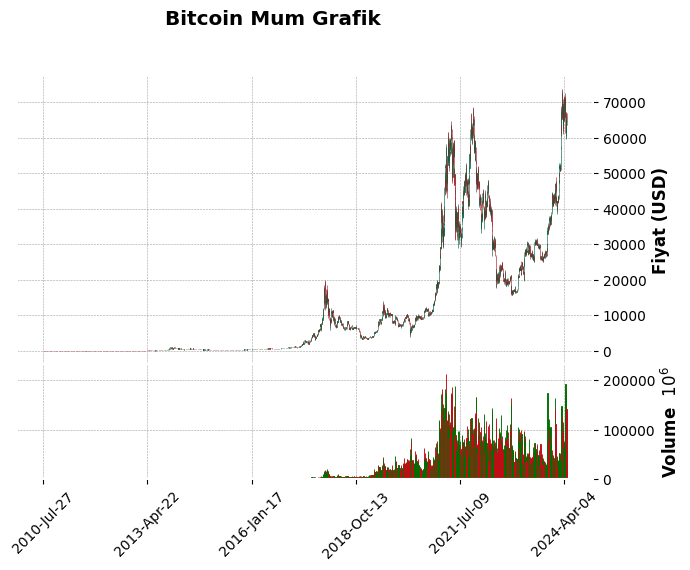

In [91]:
# Set the date column as the index
df.set_index('Start', inplace=True)
df.sort_index(inplace=True)

# Plotting the candlestick chart
mpf.plot(df, type='candle', style='charles', title='Bitcoin Mum Grafik', ylabel='Fiyat (USD)', volume=True)

**Mum Grafiği**: Finansal varlıkların belirli bir periyottaki fiyat hareketlerini görselleştirmek için kullanılan grafik türüdür. 4 adet bileşenden oluşur;

**Yeşil Mum(Kalın çizgi)**: Varlığın kapanış fiyatının açılış fiyatından yüksek olduğu ifade eder, yani belirlenen periyot içerisinde fiyat yükselmiştir. Mumun dibi açılış fiyatını, tepesi kapanış fiyatını gösterir.

**Yeşil Fitil(İnce çizgi)**: Varlığın o zaman dilimindeki en yüksek ve en düşük fiyatını gösterir.

**Kırmızı Mum(Kalın çizgi)**: Varlığın açılış fiyatının kapanış fiyatından yüksek olduğu ifade eder, yani belirlenen periyot içerisinde fiyat düşmüştür. Mumun tepesi açılış fiyatını, dibi kapanış fiyatını gösterir.

**Kırmızı Fitil(İnce çizgi)**: Varlığın o zaman dilimindeki en yüksek ve en düşük fiyatını gösterir.

**Hacim(Volume)**: Varlığın belirli bir periyottaki işlem hacmini ifade eder. Mumların rengi o periyotta düşüş mü yükseliş mi olduğunu gösterir.

Görüldüğü üzere, 2018 yılına kadarki fiyat verisi neredeyse görünemeyecek kadar küçük, yani aykırı değerler de diyebiliriz. Çünkü Bitcoin'in fiyatının bir daha asla o değerlere düşmeyeceğini biliyoruz. Bu sebeple, modelimizi eğitmeden önce veri setindeki aykırı değerleri silmek modelimizin performansını arttıracaktır.

In [92]:
# Filter data after 2018-01-01 (inclusive)
df_filtered = df[df.index >= '2018-01-01']

# Save the filtered data to a new CSV file 
df_filtered.to_csv('bitcoin_2018-01-01_2024-04-25.csv')

In [93]:
df = pd.read_csv('bitcoin_2018-01-01_2024-04-25.csv', parse_dates=['Start', 'End'])

Aykırı değerlerin olmadığı yeni bir dosya yarattık ve onunla çalışacağız.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start       2306 non-null   datetime64[ns]
 1   End         2306 non-null   datetime64[ns]
 2   Open        2306 non-null   float64       
 3   High        2306 non-null   float64       
 4   Low         2306 non-null   float64       
 5   Close       2306 non-null   float64       
 6   Volume      2306 non-null   float64       
 7   Market Cap  2306 non-null   float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 144.3 KB


5021 satırdan 2306 satıra geldik, fakat artık daha sağlıklı bir veri setimiz var. Grafiğini çizdirelim.

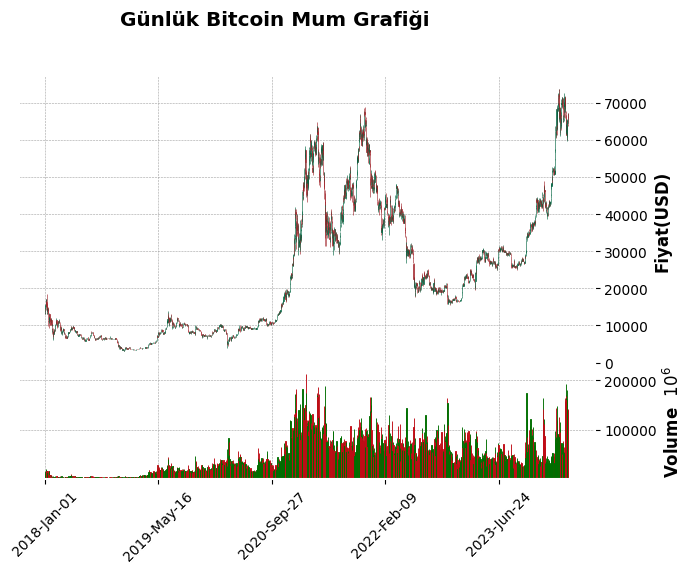

In [95]:
# Set the date column as the index
df.set_index('Start', inplace=True)
df.sort_index(inplace=True)

# Plotting the candlestick chart
mpf.plot(df, type='candle', style='charles', title='Günlük Bitcoin Mum Grafiği', ylabel='Fiyat(USD)', volume=True)

**.describe()** metodunun daha iyi sonuç verebilmesi için sayısal olmayan değerleri içermeyen yeni bir veri seti oluşturalım.

In [96]:
excluded_cols = df.columns[:2]  # Get the first two column names

# Use the 'exclude' parameter in describe()
df_description = df.drop(excluded_cols, axis=1).describe()

df_description.describe()

,High,Low,Close,Volume,Market Cap
count,8.00,8.00,8.00,8.00e+00,8.00e+00
mean,23353.25,22367.17,22994.17,5.13e+10,4.34e+11
std,23401.58,22589.00,23192.78,6.85e+10,4.60e+11
min,2306.00,2306.00,2306.00,2.31e+03,2.31e+03
25%,7389.69,7028.27,7251.11,1.27e+10,1.27e+11
50%,18669.91,17873.17,18333.94,3.59e+10,3.52e+11
75%,27370.49,25952.18,26750.72,4.89e+10,5.04e+11
max,73628.43,71333.36,73087.95,2.12e+11,1.43e+12


**Bitcoin'in** farklı zaman dilimlerindeki grafikleri inceleyelim.

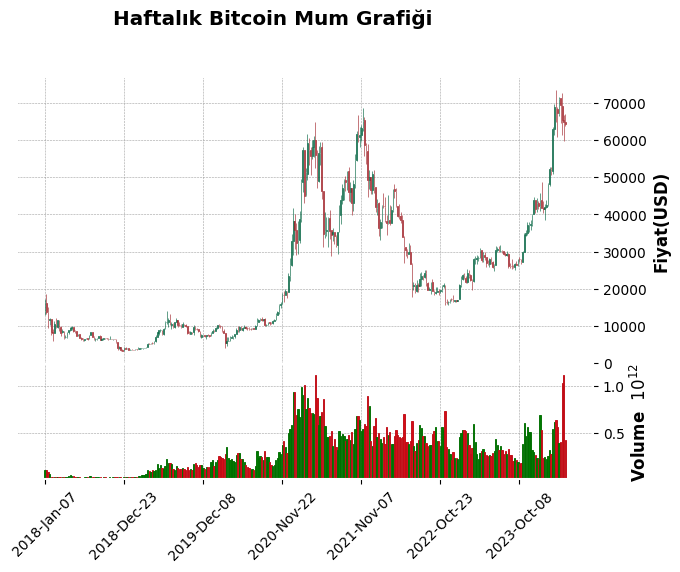

In [97]:
# Resampling from daily to weekly
bitcoin_weekly = df.resample('W').agg({'Open': 'first', 
                                  'High': 'max', 
                                  'Low': 'min', 
                                  'Close': 'last',
                                  'Volume': 'sum'})

mpf.plot(bitcoin_weekly, type='candle', style='charles', title='Haftalık Bitcoin Mum Grafiği', ylabel='Fiyat(USD)', volume=True)

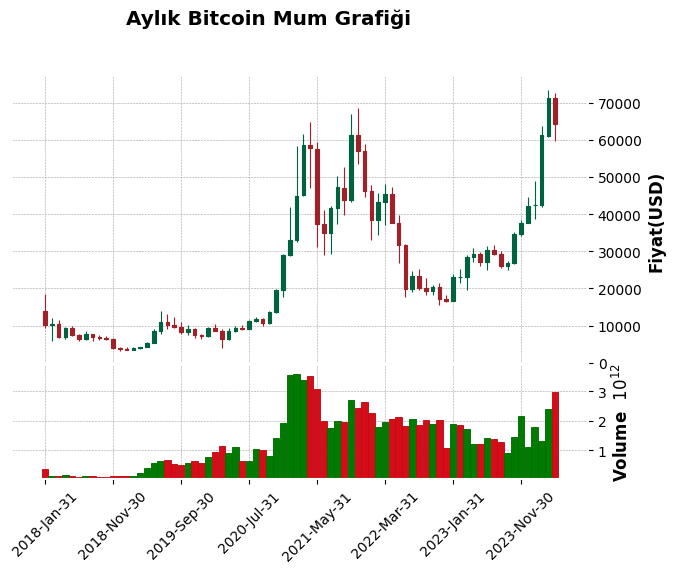

In [98]:
# Resampling from weekly to monthly
bitcoin_monthly = df.resample('M').agg({
    'Open': 'first',     # The first opening price of the month
    'High': 'max',       # The maximum high price during the month
    'Low': 'min',        # The minimum low price during the month
    'Close': 'last',     # The last closing price of the month
    'Volume': 'sum'      # Sum of volume during the month
})

# Plotting the candlestick chart for the monthly aggregated data
mpf.plot(bitcoin_monthly, type='candle', style='charles', title='Aylık Bitcoin Mum Grafiği', ylabel='Fiyat(USD)', volume=True)

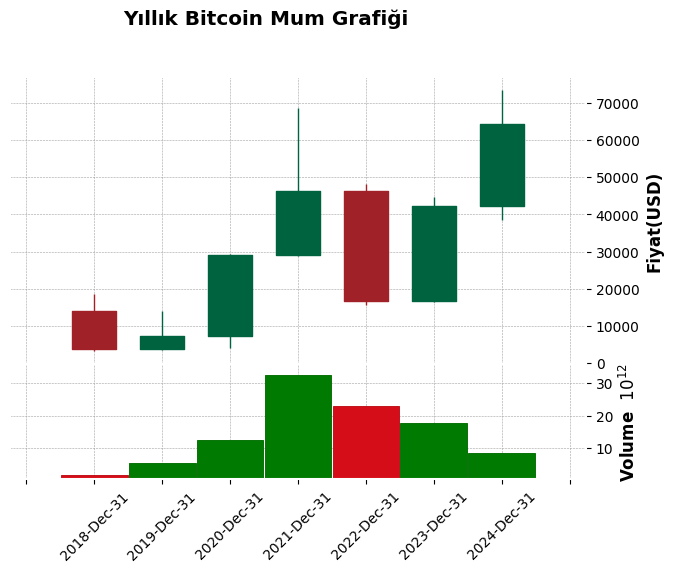

In [99]:
# Resampling from weekly to monthly
bitcoin_yearly = df.resample('Y').agg({
    'Open': 'first',     # The first opening price of the month
    'High': 'max',       # The maximum high price during the month
    'Low': 'min',        # The minimum low price during the month
    'Close': 'last',     # The last closing price of the month
    'Volume': 'sum'      # Sum of volume during the month
})

# Plotting the candlestick chart for the monthly aggregated data
mpf.plot(bitcoin_yearly, type='candle', style='charles', title='Yıllık Bitcoin Mum Grafiği', ylabel='Fiyat(USD)', volume=True)

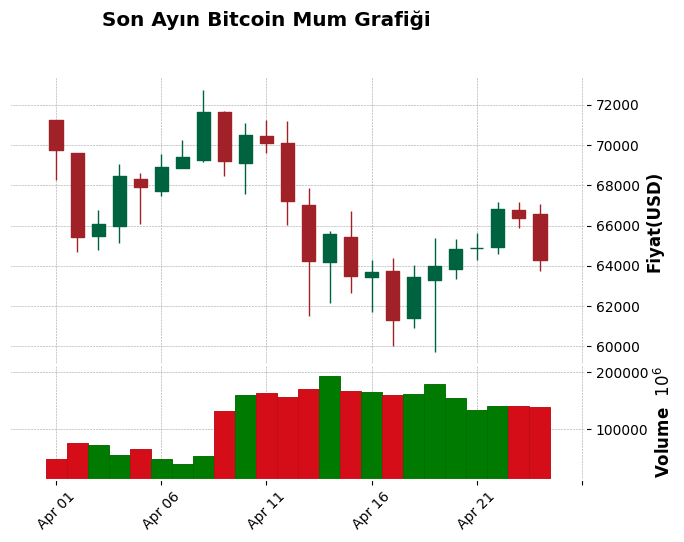

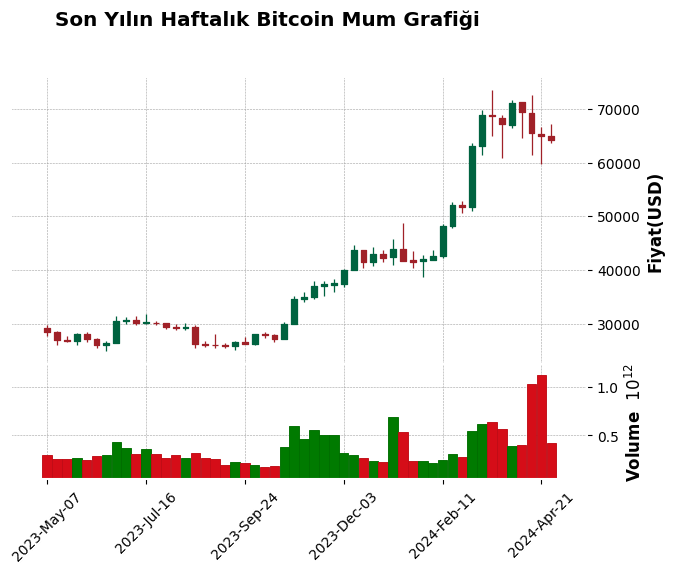

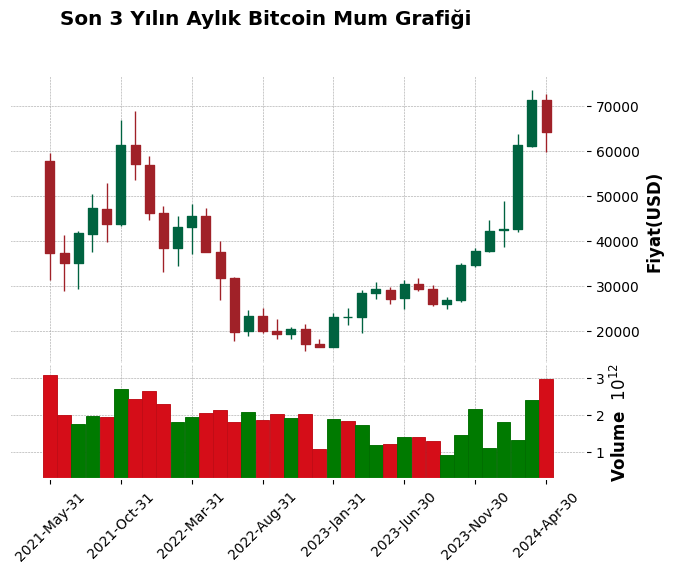

In [100]:
# 1. Daily data for the last month
last_month = df.last('1M')
mpf.plot(last_month, type='candle', style='charles', title='Son Ayın Bitcoin Mum Grafiği', ylabel='Fiyat(USD)', volume=True)

# 2. Weekly data for the last year
last_year_weekly = bitcoin_weekly.last('52W')  # Approximately one year
mpf.plot(last_year_weekly, type='candle', style='charles', title='Son Yılın Haftalık Bitcoin Mum Grafiği', ylabel='Fiyat(USD)', volume=True)

# 3. Monthly data for the last two years
last_two_years_monthly = bitcoin_monthly.last('36M')  # Approximately two years
mpf.plot(last_two_years_monthly, type='candle', style='charles', title='Son 3 Yılın Aylık Bitcoin Mum Grafiği', ylabel='Fiyat(USD)', volume=True)

# Model Seçimi

Makinemiz için en uygun modeli seçip eğitelim.

Verimizden yeni özellikler türetip modelin daha iyi çalışmasını sağlayalım.

In [101]:
#1, 7 ve 30 gün önceki kapanış fiyatlarını yeni yaratacağımız özellik tablomuza ekleyelim.
for lag in [1, 7, 30]:                                
    df[f'Close_lag_{lag}'] = df['Close'].shift(lag)  

# Verimizde kaydırma yaptığımız için oluşan boş satırları çıkaralım.
df.dropna(inplace=True)

# Özellikleri ve hedef değişkeni hazırlayalım.
features = df[[f'Close_lag_{lag}' for lag in [1, 7, 30]]]
target = df['Close']                                      

# Verileri eğitim ve test setlerine bölme - verilerin son %20'sini test seti olarak kullanalım:
split_index = int(len(df) * 0.8)
X_train, X_test = features[:split_index], features[split_index:]
y_train, y_test = target[:split_index], target[split_index:]

Burada bir **Bitcoin** tahmin modelini eğitmek için 3 yöntemimiz var:

-Doğrusal Regresyon(Linear Regression)

-Rastgele Ormanlar(Random Forests)

-Gradyan Arttırma Makinesi(Gradient Boosting Machine)

Yöntemlerin performansını değerlendirmek için **Çapraz Doğrulama(Cross-Validation)** yöntemi kullanacağız ve **MSE**, **R²** skorlarını kıyaslayacağız.

**R-Kare (R²)**:
-Regresyon modellerinde modelin ne kadar iyi uyum sağladığını gösteren bir ölçüdür.

-0 ile 1 arasında değer alır.

-Yüksek R-Kare değeri, modelin bağımlı değişkenin varyasyonunun daha fazlasını açıkladığını gösterir.

-Düşük R-Kare değeri ise modelin zayıf olduğunu ve daha fazla geliştirmeye ihtiyaç duyduğunu gösterir.

**Ortalama Kare Hatası (MSE)**:

-Tahmin edilen değerler ile gerçek değerler arasındaki ortalama hatanın karesi olarak hesaplanır.

-MSE değeri ne kadar küçükse, model o kadar iyi tahminlerde bulunur.

-MSE'nin birimi, tahmin edilen değerlerin birimi ile aynıdır.


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import KFold, cross_val_score

# Initialize and train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Cross-Validation
# Define the number of folds
k = 5

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize empty dictionaries to store accuracy scores
model_scores = {
    "Linear Regression": {"r2": [], "mse": []},
    "Random Forest": {"r2": [], "mse": []},
    "Gradient Boosting": {"r2": [], "mse": []},
}

# Perform K-Fold cross-validation
for train_index, val_index in kf.split(features):
    X_train, X_val = features.iloc[train_index], features.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]

    # Train each model on the training data
    models["Linear Regression"].fit(X_train, y_train)
    models["Random Forest"].fit(X_train, y_train)
    models["Gradient Boosting"].fit(X_train, y_train)

    # Predict on the validation data for each model
    y_pred_1 = models["Linear Regression"].predict(X_val)
    y_pred_2 = models["Random Forest"].predict(X_val)
    y_pred_3 = models["Gradient Boosting"].predict(X_val)

    # Calculate r-squarred score for each model using cross_val_score
    accuracy_1_r2 = cross_val_score(models["Linear Regression"], X_val, y_val, cv=k, scoring=make_scorer(r2_score))
    accuracy_2_r2 = cross_val_score(models["Random Forest"], X_val, y_val, cv=k, scoring=make_scorer(r2_score))
    accuracy_3_r2 = cross_val_score(models["Gradient Boosting"], X_val, y_val, cv=k, scoring=make_scorer(r2_score))

    # Calculate MSE scores directly using mean_squared_error
    accuracy_1_mse = mean_squared_error(y_val, y_pred_1)
    accuracy_2_mse = mean_squared_error(y_val, y_pred_2)
    accuracy_3_mse = mean_squared_error(y_val, y_pred_3)

    # Store accuracy scores in the dictionary
    model_scores["Linear Regression"]["r2"].append(accuracy_1_r2.mean())
    model_scores["Random Forest"]["r2"].append(accuracy_2_r2.mean())
    model_scores["Gradient Boosting"]["r2"].append(accuracy_3_r2.mean())

    model_scores["Linear Regression"]["mse"].append(accuracy_1_mse)
    model_scores["Random Forest"]["mse"].append(accuracy_2_mse)
    model_scores["Gradient Boosting"]["mse"].append(accuracy_3_mse)

# Calculate and print average accuracy for each model
for model_name, scores in model_scores.items():
    average_accuracy_r2 = sum(scores["r2"]) / len(scores["r2"])
    average_accuracy_mse = sum(scores["mse"]) / len(scores["mse"])
    print(f"Average R-squarred score for {model_name}: {average_accuracy_r2}")
    print(f"Average MSE score for {model_name}: {average_accuracy_mse}\n")


Average R-squarred score for Linear Regression: 0.9814246890936564
Average MSE score for Linear Regression: 1047283.5594300566

Average R-squarred score for Random Forest: 0.9321021550814683
Average MSE score for Random Forest: 1272267.4334853338

Average R-squarred score for Gradient Boosting: 0.9309047699135113
Average MSE score for Gradient Boosting: 1183671.1888496317



Sonuçlardan anlaşıldığı üzere, en düşük MSE ve en yüksek R^2 skoruna sahip olan model Lineer Regresyondur. Bu nedenle Lineer Regresyonla yolumuza devam ediyoruz. 

R² skorlarının bu kadar yüksek olmasının sebebi Bitcoin'in günlük fiyat hareketlerin yüzdesel olarak düşük olmasıdır. Fakat Bitcoin en büyük kripto para birimi olduğu için hareketlerinin piyasaya etkisi büyüktür.

MSE skorlarının 6 haneli sayılara çıkma sebebi de Bitcoin'in fiyatının 5 haneli sayılarda olmasıdır.

Şimdi finans piyasalarında sıklıkla kullanılan **Hareketli Ortalama(MA)** ve **Üstel Hareketli Ortalama(EMA)** indikatörlerini(metrik) özellik tablomuza ekleyelim.

**Hareketli Ortalama (MA)**:

-Bir varlığın fiyatının belirli bir zaman aralığındaki ortalamasını gösteren bir teknik göstergedir.

-Trendleri belirlemek, destek ve direnç seviyelerini tanımlamak ve alım satım sinyalleri oluşturmak için kullanılır.

-Hesaplanması için belirli bir zaman aralığı (örneğin 10 gün, 50 gün) seçilir ve o zaman aralığındaki her fiyatın ortalaması alınır.

**Üstel Hareketli Ortalama (EMA)**:

-HA'nın bir türüdür ve daha yakın fiyat verilerine daha fazla ağırlık verir.

-Bu sayede fiyat değişimlerine daha hızlı tepki verir ve trendleri daha net gösterir.

-SMA'ya kıyasla daha az gecikmeli bir göstergedir.

**Not**: **Destek**, fiyatın düşüş eğiliminde olduğu ve bir noktada düşüşün duraklayacağı seviyeyi, **direnç** ise fiyatın yükseliş eğiliminde olduğu ve bir noktada yükselişin duraklayacağı seviyeyi ifade eder.


In [116]:
# Create lagged features
for lag in [1, 7, 30]:
    df[f'Close_lag_{lag}'] = df['Close'].shift(lag)

# Create Moving Average and exponential moving averages
for window in [7, 14, 30]:
    df[f'Moving_Average_{window}'] = df['Close'].rolling(window).mean()
    df[f'EMA_{window}'] = df['Close'].ewm(span=window, adjust=False).mean()

Özellik tablosu:

In [118]:
# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target
features = df[[col for col in df.columns if 'lag' in col or 'Moving_Average_' in col or 'EMA' in col]]
target = df['Close']

features.tail()

,Close_lag_1,Close_lag_7,Close_lag_30,EMA_7,EMA_14,EMA_30,Moving_Average_7,Moving_Average_14,Moving_Average_30
Start,,,,,,,,,
2024-04-20,63965.95,64255.94,65476.17,64376.69,65440.43,66052.84,63758.79,66330.01,67371.93
2024-04-21,64857.99,65582.95,63567.63,64506.74,65367.95,65978.26,63660.78,66009.16,67416.24
2024-04-22,64896.87,63496.91,64238.03,65084.77,65561.41,66032.49,64135.35,65665.38,67502.27
2024-04-23,66818.89,63679.78,67246.83,65410.23,65671.44,66055.34,64522.04,65464.55,67473.60
2024-04-24,66386.61,61309.97,69901.99,65130.44,65487.39,65941.52,64947.91,65020.09,67286.57


Modelimizi son eklediğimiz indikatörleri de kullanarak tekrar eğitelim:

In [119]:
# Split data into training and test sets 
split_index = int(len(df) * 0.8)
X_train, X_test = features.iloc[:split_index], features.iloc[split_index:]
y_train, y_test = target.iloc[:split_index], target.iloc[split_index:]

# Train model using Linear Regression
models['Linear Regression'].fit(X_train, y_train)
predictions = models['Linear Regression'].predict(X_test)
    

Veri setimizde nisan ayının 24 günü bulunduğu için modelimize 24 günlük bir tahmin yaptıralım:

In [120]:
# Example forecast
# Adjust the index for your forecast horizon
forecast_index = -24  # Example: last 24 days from the dataset
forecast_values = models['Linear Regression'].predict(features.iloc[forecast_index:])
rounded_values = np.around(forecast_values, decimals=2)
print("Forecast Values of last 30 days:\n", rounded_values)


Forecast Values of last 30 days:
 [69489.11 66610.28 67032.69 68043.12 66968.64 68460.81 69680.21 72264.92
 69471.74 70735.38 69925.5  67264.56 64822.75 65271.2  62975.27 63008.57
 61092.32 63842.56 63522.9  64233.58 64978.43 66901.66 66556.25 64624.36]


Tahmini değerlerle bir grafik çizdirip gerçeğiyle kıyaslayalım.

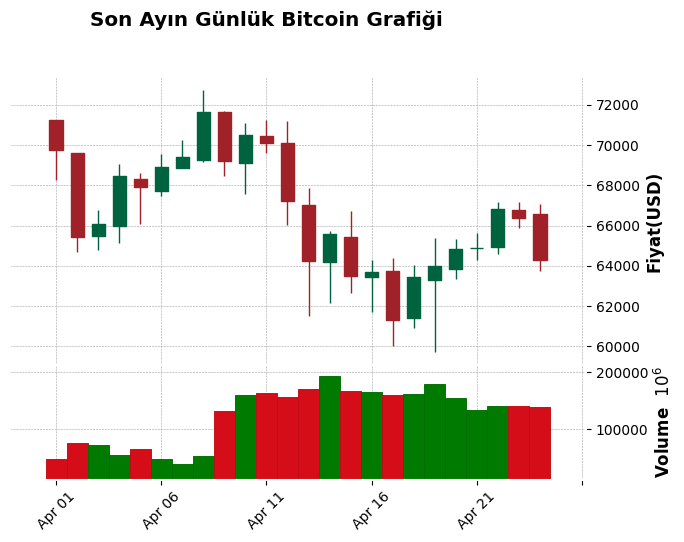

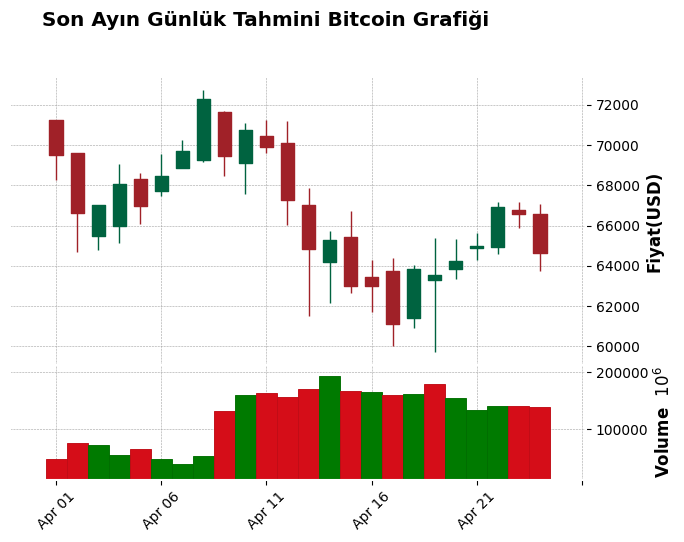

In [121]:
last_month = df.last('1M')
mpf.plot(last_month, type='candle', style='charles', title='Son Ayın Günlük Bitcoin Grafiği', ylabel='Fiyat(USD)', volume=True)

last_month_prediction = last_month
last_month_prediction["Close"] = forecast_values

mpf.plot(last_month_prediction, type='candle', style='charles', title='Son Ayın Günlük Tahmini Bitcoin Grafiği', ylabel='Fiyat(USD)', volume=True)

2024 yılının tahmini fiyat grafiğini çizdirelim

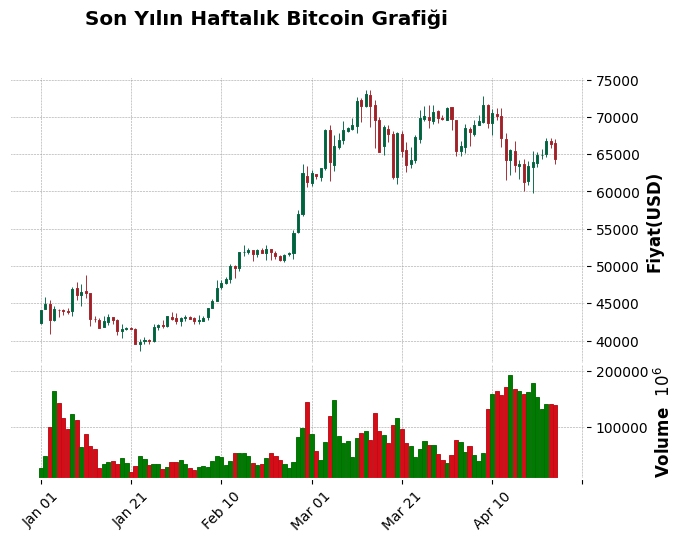

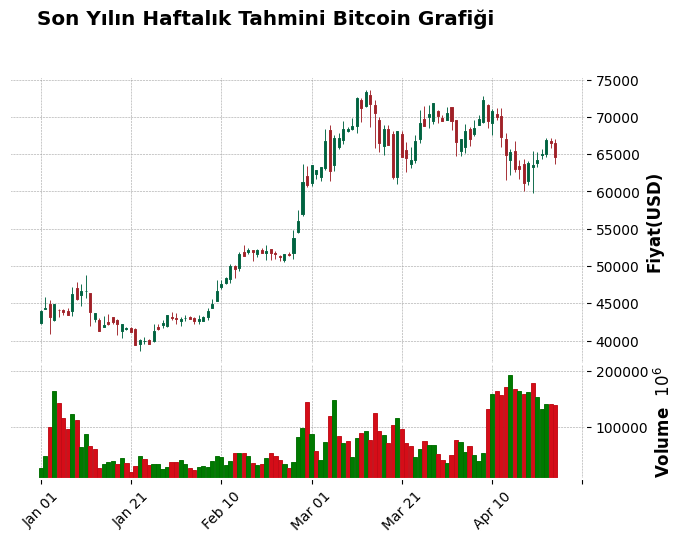

In [124]:
# Example forecast 2
# Adjust the index for your forecast horizon
forecast_index = -115  # Example: last 365 days from the dataset
forecast_values = models['Linear Regression'].predict(features.iloc[forecast_index:])
rounded_values = np.around(forecast_values, decimals=2)


last_month = df.last('1Y')
mpf.plot(last_month, type='candle', style='charles', title='Son Yılın Haftalık Bitcoin Grafiği', ylabel='Fiyat(USD)', volume=True)

last_month_prediction = last_month
last_month_prediction["Close"] = forecast_values

mpf.plot(last_month_prediction, type='candle', style='charles', title='Son Yılın Haftalık Tahmini Bitcoin Grafiği', ylabel='Fiyat(USD)', volume=True)

Görüldüğü üzere, modelimiz gerçeğine çok yakın bir grafik çizebiliyor. Ancak gerçek hayatta kullanılabilmesi için bazı özellikler eklenmeli.